In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sp_data = pd.read_csv("./enronSpamSubset.csv").drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
#sp_data2 = pd.read_csv("./completeSpamAssassin.csv").drop(['Unnamed: 0'], axis=1)
sp_data1 = pd.read_csv("./lingSpam.csv").drop(['Unnamed: 0'], axis=1)
sp_data = pd.concat([sp_data, sp_data1])
sp_data.head()

,Body,Label
0,Subject: stock promo mover : cwtd\n * * * urge...,1
1,Subject: are you listed in major search engine...,1
2,"Subject: important information thu , 30 jun 20...",1
3,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,"Subject: "" bidstogo "" is places to go , things...",1


In [3]:
# check if we have duplicates
print("There are {} duplicates.".format(np.sum(sp_data.duplicated())))
sp_data = sp_data.drop_duplicates() # remove duplicates

There are 327 duplicates.


In [4]:
sp_data.info() # check if we have missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12278 entries, 0 to 2604
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    12278 non-null  object
 1   Label   12278 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 287.8+ KB


In [5]:
# delete missing values
sp_data.dropna(inplace=True)
sp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12278 entries, 0 to 2604
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    12278 non-null  object
 1   Label   12278 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 287.8+ KB


No missing values!

Here you can check specifc mails by selecting an index.

In [6]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')


def prep_mails(text_col, features=[1,1,1,1,1]):
    
    text_col = [text[7:] for text in text_col]
    
    if features[0]:
        # remove links since they end up in tokens with no meaning
        text_col = [re.sub(r'http\S+', '', text) for text in text_col]
    
    if features[1]:
        # remove everything exept alphabetical characters and numbers
        pattern = ["[^a-zA-Z0-9]", "[^a-zA-Z]"]
        text_col = [re.sub(pattern[1]," ",text) for text in text_col]
    
    if features[2]:
        # convert uppercase chars in lowercase chars
        text_col = [text.lower() for text in text_col]
    
    # turn sentences into seperate worlds
    data_tokenized = [nltk.word_tokenize(text) for text in text_col]
    
    if features[3]:
        # lemmatize all world, that is convert them into most basic form
        lemma = WordNetLemmatizer()
        data_tokenized = [[lemma.lemmatize(word) for word in text] for text in data_tokenized]
    
    if features[4]:
        stopwords = nltk.corpus.stopwords.words("english")
        data_tokenized = [[word for word in text if word not in stopwords] for text in data_tokenized]
    
    return data_tokenized


[nltk_data] Downloading package wordnet to /home/fabian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/fabian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/fabian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
testtext = ["Subject: Hello, this is test 1.0. Here we show how the prep_mails function affects Emails!!!!",
            "A tutorial can be found at https://www.youtube.com/watch?v=cNLPt02RwF0"]
outtext = prep_mails(testtext)
print(outtext)

[['hello', 'test', 'show', 'prep', 'mail', 'function', 'affect', 'email'], ['ial', 'found']]


In [8]:
mail_index = 5
print(sp_data.iloc[mail_index,1]) # 1 for spam 0 for ham
print(sp_data.iloc[mail_index,0])
print(prep_mails( [sp_data.iloc[mail_index,0]]))

1
Subject: dont pay more than $ 100 for ur softwares miseries
 chheap softtwares for you , all are original oemmajor titles from micros 0 ft and adobe for rock bottom prriicegreat bargaain sale ! variety discoount softtwares at wholesale chaeap pricing !
 microsoft windows xp professional - my priice : $ 50 normal priice : $ 270 . 99 ; you savve $ 220
 microsoft office xp professional - my priice : $ 100 normal priice : $ 579 . 99 ; you savve $ 480
 adobe photoshop 7 - my priice : $ 80 normal priice : $ 609 . 99 ; you savve $ 550
 28 more popular titles > > cliickk here for more titles
 wonder why our priices are unbelievably low ?
 we are currently clearing our goods at incredibily cheeap sale - priice in connection with the shutdown of our shop and the closure of the stockhouse . don ' t missss your lucky chance to get the best priicce on discoouunt software !
 we are the authorized agent and an established reseller offering oem licensing software .
 we possesses all the necessary ce

In [9]:
sp_data_prepped = prep_mails(sp_data["Body"])

In [82]:
len(np.unique([word for text in sp_data_prepped for word in text]))

103784

In [ ]:
sp_data_unprepped = prep_mails(sp_data["Body"],[0,0,0,0,0])
len(np.unique([word for text in sp_data_unprepped for word in text]))

In [10]:
# count occurences of attibutes in mails
# reduced number of attributes to the N-attributes with most occureces
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=10)
x = vectorizer.fit_transform([" ".join(text) for text in sp_data_prepped]).toarray()
vectorizer.get_feature_names()

['ect',
 'enron',
 'ha',
 'information',
 'language',
 'mail',
 'one',
 'please',
 'subject',
 'university']

In [11]:
x

array([[    0,     0,     8, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     1,     0],
       ...,
       [    0,     0,     0, ...,     1,     0,     3],
       [    0,     0,     0, ...,     0,     0,     0],
       [    2,     0,  3792, ...,  3978,  6598, 11256]])

In [12]:
# seperate spam and ham mails
spam_only = np.array(sp_data_prepped)[sp_data["Label"]]
ham_only = np.array(sp_data_prepped)[np.logical_not(sp_data["Label"])]

<ipython-input-12-85bc1d2f8193>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  spam_only = np.array(sp_data_prepped)[sp_data["Label"]]
<ipython-input-12-85bc1d2f8193>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ham_only = np.array(sp_data_prepped)[np.logical_not(sp_data["Label"])]


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
vec_size = 20
vectorizer0 = CountVectorizer(max_features=vec_size)
vectorizer1 = CountVectorizer(max_features=vec_size)
spam_attr_count = vectorizer0.fit_transform([" ".join(text) for text in spam_only]).toarray()
ham_attr_count = vectorizer1.fit_transform([" ".join(text) for text in ham_only]).toarray()

In [30]:
s0 = np.sum(spam_attr_count,axis=0)
mask0 = np.argsort(s0)
spam_names = np.array(vectorizer0.get_feature_names())[mask0]
print(spam_names)
print(s0[mask0])

s1 = np.sum(ham_attr_count,axis=0)
mask1 = np.argsort(s1)
ham_names = np.array(vectorizer1.get_feature_names())[mask1]
print(ham_names)
print(s1[mask1])

['hong' 'trading' 'stake' 'limited' 'kong' 'within' 'business' 'center'
 'company' 'investment' 'stock' 'ha' 'club' 'ceo' 'cwtd' 'statement'
 'corp' 'world' 'trade' 'china']
[ 35475  35475  35475  35475  35475  35475  40658  42570  49665  49665
  49665  56760  56760  56760  63855  63855  70950 134805 148995 156090]
['com' 'also' 'address' 'new' 'conference' 'de' 'wa' 'would' 'mail'
 'linguistics' 'ha' 'please' 'information' 'one' 'subject' 'paper' 'ect'
 'university' 'enron' 'language']
[ 6954  7004  7123  8196  8338  8497  8701  8727  8922  8960  9123  9328
  9499  9600 10774 10853 10986 17208 17904 23431]


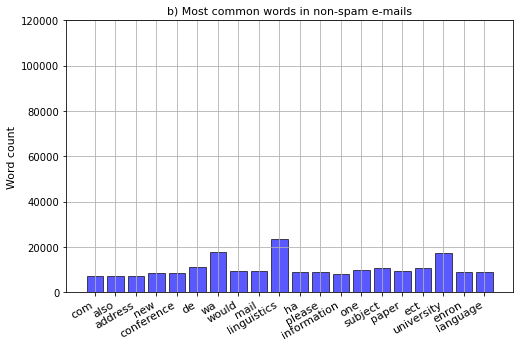

In [31]:
plt.figure(figsize=(8,5))
plt.bar(x=ham_names, height=s1, color='blue', edgecolor='k', alpha=0.65)
plt.xticks(rotation=30,fontsize=11, ha="right")
plt.title("b) Most common words in non-spam e-mails",fontsize=11)
plt.ylabel("Word count",fontsize=11)
plt.ylim(0,1.2e5)
plt.grid()
plt.savefig("./ham_count.pdf")

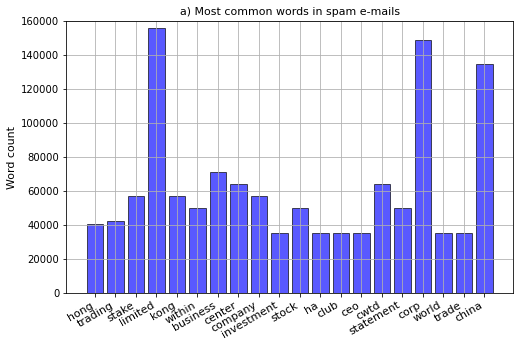

In [32]:
plt.figure(figsize=(8,5))
plt.bar(x=spam_names, height=s0, color='blue', edgecolor='k', alpha=0.65)
plt.xticks(rotation=30,fontsize=11, ha="right")
plt.title("a) Most common words in spam e-mails",fontsize=11)
plt.ylabel("Word count",fontsize=11)
plt.ylim(0,1.6e5)
plt.grid()
plt.savefig("./spam_count.pdf")

# Plots for report

In [74]:
mail_index = 100
print(sp_data.iloc[mail_index,1]) # 1 for spam 0 for ham
print(sp_data.iloc[mail_index,0])

mail_index = 6006
print(sp_data.iloc[mail_index,1]) # 1 for spam 0 for ham
print(sp_data.iloc[mail_index,0])

1
Subject: inexpensive online medication here
 pummel wah springtail cutler bodyguard
 we ship quality medications overnight to your door !
 simple , quick and affordable !
 we deliver quality medications to your door !
 stop getting brochures here
 systematic defector alum arachnid inure cross he pickering

0
Subject: organizational changes
 we are pleased to announce the following organizational changes :
 enron global assets and services
 in order to increase senior management focus on our international businesses , we are creating a new business unit , enron global assets and services ( egas ) . egas will be led by kevin hannon , chief executive officer , and jim hughes , chief operating officer . kevin will report to the enron corp . office of the chairman . with the exception of the wessex water company ( which will remain in the enron transportation services organization ) and enron india ( discussed below ) , egas will include all of the assets and activities of the former enro

Text(0.5, 1.0, 'Distribution of Spam and Nonspam')

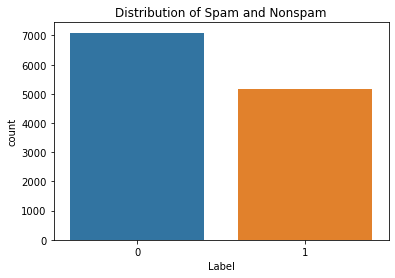

In [20]:
ax = sns.countplot(data=sp_data, x='Label')
ax.set_title("Distribution of Spam and Nonspam")